# 10minutes to pandas
* https://dataitgirls2.github.io/10minutes2pandas/

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Object Creation(객체 생성)

In [29]:
#리스트를 통해 Series를 생성하고, 정수로 만들어진 인덱스 기본값을 불러오기
s = pd.Series([1,3,5,np.nan,6,8])


In [30]:
#Datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임 생성
dates = pd.date_range('20210203', periods = 6)
dates

DatetimeIndex(['2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06',
               '2021-02-07', '2021-02-08'],
              dtype='datetime64[ns]', freq='D')

In [31]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-07,0.405453,0.289092,1.321158,-1.546906
2021-02-08,-0.202646,-0.655969,0.193421,0.553439


In [32]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20210203'),
                    'C' : pd.Series(1,index=list(range(4)), dtype = 'float32'),
                    'D' : np.array([3]*4, dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2021-02-03,1.0,3,test,foo
1,1.0,2021-02-03,1.0,3,train,foo
2,1.0,2021-02-03,1.0,3,test,foo
3,1.0,2021-02-03,1.0,3,train,foo


In [33]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data(데이터 확인하기)

In [34]:
df.tail()

,A,B,C,D
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-07,0.405453,0.289092,1.321158,-1.546906
2021-02-08,-0.202646,-0.655969,0.193421,0.553439


In [35]:
df.head()

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-07,0.405453,0.289092,1.321158,-1.546906


In [36]:
df.index

DatetimeIndex(['2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06',
               '2021-02-07', '2021-02-08'],
              dtype='datetime64[ns]', freq='D')

In [37]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [38]:
df.values

array([[ 4.71435164e-01, -1.19097569e+00,  1.43270697e+00,
        -3.12651896e-01],
       [-7.20588733e-01,  8.87162940e-01,  8.59588414e-01,
        -6.36523504e-01],
       [ 1.56963721e-02, -2.24268495e+00,  1.15003572e+00,
         9.91946022e-01],
       [ 9.53324128e-01, -2.02125482e+00, -3.34077366e-01,
         2.11836468e-03],
       [ 4.05453412e-01,  2.89091941e-01,  1.32115819e+00,
        -1.54690555e+00],
       [-2.02646325e-01, -6.55969344e-01,  1.93421376e-01,
         5.53438911e-01]])

In [39]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.153779,-0.822438,0.770472,-0.158096
std,0.585516,1.247079,0.699548,0.898456
min,-0.720589,-2.242685,-0.334077,-1.546906
25%,-0.148061,-1.813685,0.359963,-0.555556
50%,0.210575,-0.923473,1.004812,-0.155267
75%,0.454940,0.052827,1.278378,0.415609
max,0.953324,0.887163,1.432707,0.991946


In [40]:
df.T

,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08
A,0.471435,-0.720589,0.015696,0.953324,0.405453,-0.202646
B,-1.190976,0.887163,-2.242685,-2.021255,0.289092,-0.655969
C,1.432707,0.859588,1.150036,-0.334077,1.321158,0.193421
D,-0.312652,-0.636524,0.991946,0.002118,-1.546906,0.553439


In [41]:
df.sort_index(axis = 1, ascending = False)

,D,C,B,A
2021-02-03,-0.312652,1.432707,-1.190976,0.471435
2021-02-04,-0.636524,0.859588,0.887163,-0.720589
2021-02-05,0.991946,1.150036,-2.242685,0.015696
2021-02-06,0.002118,-0.334077,-2.021255,0.953324
2021-02-07,-1.546906,1.321158,0.289092,0.405453
2021-02-08,0.553439,0.193421,-0.655969,-0.202646


In [42]:
df.sort_values(by="B")

,A,B,C,D
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-08,-0.202646,-0.655969,0.193421,0.553439
2021-02-07,0.405453,0.289092,1.321158,-1.546906
2021-02-04,-0.720589,0.887163,0.859588,-0.636524


## Selection(선택

In [43]:
df['A']

2021-02-03    0.471435
2021-02-04   -0.720589
2021-02-05    0.015696
2021-02-06    0.953324
2021-02-07    0.405453
2021-02-08   -0.202646
Freq: D, Name: A, dtype: float64

In [44]:
df[0:3]

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946


In [45]:
df['20210203':'20210205']

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946


In [46]:
df.loc[dates[0]]

A    0.471435
B   -1.190976
C    1.432707
D   -0.312652
Name: 2021-02-03 00:00:00, dtype: float64

In [47]:
df.loc[:,["A","B"]]

,A,B
2021-02-03,0.471435,-1.190976
2021-02-04,-0.720589,0.887163
2021-02-05,0.015696,-2.242685
2021-02-06,0.953324,-2.021255
2021-02-07,0.405453,0.289092
2021-02-08,-0.202646,-0.655969


In [48]:
df.loc['20210203':'20210205',["A","B"]]

,A,B
2021-02-03,0.471435,-1.190976
2021-02-04,-0.720589,0.887163
2021-02-05,0.015696,-2.242685


In [49]:
df.loc['20210203',["A","B"]]

A    0.471435
B   -1.190976
Name: 2021-02-03 00:00:00, dtype: float64

In [50]:
df.loc['20210203',"A"]

0.47143516373249306

In [51]:
df.loc[dates[0],"A"]

0.47143516373249306

In [52]:
df.at[dates[0],"A"]

0.47143516373249306

In [53]:
df.iloc[3]

A    0.953324
B   -2.021255
C   -0.334077
D    0.002118
Name: 2021-02-06 00:00:00, dtype: float64

In [54]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-02-04,-0.720589,0.859588
2021-02-05,0.015696,1.150036
2021-02-07,0.405453,1.321158


In [55]:
df.iloc[1:3,]

,A,B,C,D
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946


In [56]:
df.iloc[:,1:3]

,B,C
2021-02-03,-1.190976,1.432707
2021-02-04,0.887163,0.859588
2021-02-05,-2.242685,1.150036
2021-02-06,-2.021255,-0.334077
2021-02-07,0.289092,1.321158
2021-02-08,-0.655969,0.193421


In [57]:
df.iloc[1,1]

0.8871629403077386

In [58]:
df.iat[1,1]

0.8871629403077386

In [59]:
df[df.A>0] # = df[df$A >0, ]in r

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-07,0.405453,0.289092,1.321158,-1.546906


In [60]:
df[df["A"]>0]

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-07,0.405453,0.289092,1.321158,-1.546906


In [61]:
df[df>0]

,A,B,C,D
2021-02-03,0.471435,NaN,1.432707,NaN
2021-02-04,NaN,0.887163,0.859588,NaN
2021-02-05,0.015696,NaN,1.150036,0.991946
2021-02-06,0.953324,NaN,NaN,0.002118
2021-02-07,0.405453,0.289092,1.321158,NaN
2021-02-08,NaN,NaN,0.193421,0.553439


In [62]:
df2 = df.copy()
df2

,A,B,C,D
2021-02-03,0.471435,-1.190976,1.432707,-0.312652
2021-02-04,-0.720589,0.887163,0.859588,-0.636524
2021-02-05,0.015696,-2.242685,1.150036,0.991946
2021-02-06,0.953324,-2.021255,-0.334077,0.002118
2021-02-07,0.405453,0.289092,1.321158,-1.546906
2021-02-08,-0.202646,-0.655969,0.193421,0.553439


In [63]:
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2021-02-03,0.471435,-1.190976,1.432707,-0.312652,one
2021-02-04,-0.720589,0.887163,0.859588,-0.636524,one
2021-02-05,0.015696,-2.242685,1.150036,0.991946,two
2021-02-06,0.953324,-2.021255,-0.334077,0.002118,three
2021-02-07,0.405453,0.289092,1.321158,-1.546906,four
2021-02-08,-0.202646,-0.655969,0.193421,0.553439,three


In [64]:
df2[df2.E.isin(['two','four'])]
# = df2[df2["E"].isin(['two','four'])]

,A,B,C,D,E
2021-02-05,0.015696,-2.242685,1.150036,0.991946,two
2021-02-07,0.405453,0.289092,1.321158,-1.546906,four


In [65]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20210203', periods = 6))
s1

2021-02-03    1
2021-02-04    2
2021-02-05    3
2021-02-06    4
2021-02-07    5
2021-02-08    6
Freq: D, dtype: int64

In [66]:
df['F'] = s1
df

,A,B,C,D,F
2021-02-03,0.471435,-1.190976,1.432707,-0.312652,1
2021-02-04,-0.720589,0.887163,0.859588,-0.636524,2
2021-02-05,0.015696,-2.242685,1.150036,0.991946,3
2021-02-06,0.953324,-2.021255,-0.334077,0.002118,4
2021-02-07,0.405453,0.289092,1.321158,-1.546906,5
2021-02-08,-0.202646,-0.655969,0.193421,0.553439,6


In [67]:
df.at[dates[0],"A"] = 0
df

,A,B,C,D,F
2021-02-03,0.000000,-1.190976,1.432707,-0.312652,1
2021-02-04,-0.720589,0.887163,0.859588,-0.636524,2
2021-02-05,0.015696,-2.242685,1.150036,0.991946,3
2021-02-06,0.953324,-2.021255,-0.334077,0.002118,4
2021-02-07,0.405453,0.289092,1.321158,-1.546906,5
2021-02-08,-0.202646,-0.655969,0.193421,0.553439,6


In [68]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2021-02-03,0.000000,0.000000,1.432707,-0.312652,1
2021-02-04,-0.720589,0.887163,0.859588,-0.636524,2
2021-02-05,0.015696,-2.242685,1.150036,0.991946,3
2021-02-06,0.953324,-2.021255,-0.334077,0.002118,4
2021-02-07,0.405453,0.289092,1.321158,-1.546906,5
2021-02-08,-0.202646,-0.655969,0.193421,0.553439,6


In [69]:
df.loc[:,'D'] = np.array([5]*len(df))
df

,A,B,C,D,F
2021-02-03,0.000000,0.000000,1.432707,5,1
2021-02-04,-0.720589,0.887163,0.859588,5,2
2021-02-05,0.015696,-2.242685,1.150036,5,3
2021-02-06,0.953324,-2.021255,-0.334077,5,4
2021-02-07,0.405453,0.289092,1.321158,5,5
2021-02-08,-0.202646,-0.655969,0.193421,5,6


In [70]:
df2 = df.copy()
df2

,A,B,C,D,F
2021-02-03,0.000000,0.000000,1.432707,5,1
2021-02-04,-0.720589,0.887163,0.859588,5,2
2021-02-05,0.015696,-2.242685,1.150036,5,3
2021-02-06,0.953324,-2.021255,-0.334077,5,4
2021-02-07,0.405453,0.289092,1.321158,5,5
2021-02-08,-0.202646,-0.655969,0.193421,5,6


In [71]:
df2[df2>0] = -df2
df2

,A,B,C,D,F
2021-02-03,0.000000,0.000000,-1.432707,-5,-1
2021-02-04,-0.720589,-0.887163,-0.859588,-5,-2
2021-02-05,-0.015696,-2.242685,-1.150036,-5,-3
2021-02-06,-0.953324,-2.021255,-0.334077,-5,-4
2021-02-07,-0.405453,-0.289092,-1.321158,-5,-5
2021-02-08,-0.202646,-0.655969,-0.193421,-5,-6


## Missing Data(결측치)

In [72]:
df

,A,B,C,D,F
2021-02-03,0.000000,0.000000,1.432707,5,1
2021-02-04,-0.720589,0.887163,0.859588,5,2
2021-02-05,0.015696,-2.242685,1.150036,5,3
2021-02-06,0.953324,-2.021255,-0.334077,5,4
2021-02-07,0.405453,0.289092,1.321158,5,5
2021-02-08,-0.202646,-0.655969,0.193421,5,6


In [73]:
df1=df.reindex(index = dates[0:4], columns = list(df.columns)+['E'])
df1

,A,B,C,D,F,E
2021-02-03,0.000000,0.000000,1.432707,5,1,NaN
2021-02-04,-0.720589,0.887163,0.859588,5,2,NaN
2021-02-05,0.015696,-2.242685,1.150036,5,3,NaN
2021-02-06,0.953324,-2.021255,-0.334077,5,4,NaN


In [74]:
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,F,E
2021-02-03,0.000000,0.000000,1.432707,5,1,1.0
2021-02-04,-0.720589,0.887163,0.859588,5,2,1.0
2021-02-05,0.015696,-2.242685,1.150036,5,3,NaN
2021-02-06,0.953324,-2.021255,-0.334077,5,4,NaN


In [75]:
df1.dropna(how = 'any') #결측치 행 삭제

,A,B,C,D,F,E
2021-02-03,0.000000,0.000000,1.432707,5,1,1.0
2021-02-04,-0.720589,0.887163,0.859588,5,2,1.0


In [76]:
df1.fillna(value = 5) #결측치 대체

,A,B,C,D,F,E
2021-02-03,0.000000,0.000000,1.432707,5,1,1.0
2021-02-04,-0.720589,0.887163,0.859588,5,2,1.0
2021-02-05,0.015696,-2.242685,1.150036,5,3,5.0
2021-02-06,0.953324,-2.021255,-0.334077,5,4,5.0


In [77]:
pd.isna(df1) #결측치

,A,B,C,D,F,E
2021-02-03,False,False,False,False,False,False
2021-02-04,False,False,False,False,False,False
2021-02-05,False,False,False,False,False,True
2021-02-06,False,False,False,False,False,True


In [78]:
pd.notna(df1) #not 결측치

,A,B,C,D,F,E
2021-02-03,True,True,True,True,True,True
2021-02-04,True,True,True,True,True,True
2021-02-05,True,True,True,True,True,False
2021-02-06,True,True,True,True,True,False


## Operation(연산)

In [79]:
df.mean() #열 평균

A    0.075206
B   -0.623942
C    0.770472
D    5.000000
F    3.500000
dtype: float64

In [80]:
df.mean(1) #행 평균

2021-02-03    1.486541
2021-02-04    1.605233
2021-02-05    1.384609
2021-02-06    1.519598
2021-02-07    2.403141
2021-02-08    2.066961
Freq: D, dtype: float64

In [81]:
s = pd.Series([1,3,5,np.nan,6,8], index = dates).shift(2)
s

2021-02-03    NaN
2021-02-04    NaN
2021-02-05    1.0
2021-02-06    3.0
2021-02-07    5.0
2021-02-08    NaN
Freq: D, dtype: float64

In [82]:
df.sub(s, axis='index')
#index 기준으로 데이터프레임 df에 s값을 행별로 더하기

,A,B,C,D,F
2021-02-03,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN
2021-02-05,-0.984304,-3.242685,0.150036,4.0,2.0
2021-02-06,-2.046676,-5.021255,-3.334077,2.0,1.0
2021-02-07,-4.594547,-4.710908,-3.678842,0.0,0.0
2021-02-08,NaN,NaN,NaN,NaN,NaN


In [83]:
df.apply(np.cumsum)

,A,B,C,D,F
2021-02-03,0.000000,0.000000,1.432707,5,1
2021-02-04,-0.720589,0.887163,2.292295,10,3
2021-02-05,-0.704892,-1.355522,3.442331,15,6
2021-02-06,0.248432,-3.376777,3.108254,20,10
2021-02-07,0.653885,-3.087685,4.429412,25,15
2021-02-08,0.451239,-3.743654,4.622833,30,21


In [84]:
df.apply(lambda x : x.max() - x.min())

A    1.673913
B    3.129848
C    1.766784
D    0.000000
F    5.000000
dtype: float64

In [85]:
np.random.seed(1234)
s = pd.Series(np.random.randint(0,7,size = 10))
s

0    3
1    6
2    5
3    4
4    4
5    0
6    1
7    1
8    1
9    2
dtype: int32

In [86]:
s.value_counts()

1    3
4    2
6    1
5    1
3    1
2    1
0    1
dtype: int64

In [87]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [88]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [89]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [90]:
s.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

## Merge(병합)

In [91]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


In [92]:
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0  0.471435 -1.190976  1.432707 -0.312652
 1 -0.720589  0.887163  0.859588 -0.636524
 2  0.015696 -2.242685  1.150036  0.991946,
           0         1         2         3
 3  0.953324 -2.021255 -0.334077  0.002118
 4  0.405453  0.289092  1.321158 -1.546906
 5 -0.202646 -0.655969  0.193421  0.553439
 6  1.318152 -0.469305  0.675554 -1.817027,
           0         1         2         3
 7 -0.183109  1.058969 -0.397840  0.337438
 8  1.047579  1.045938  0.863717 -0.122092
 9  0.124713 -0.322795  0.841675  2.390961]

In [93]:
pd.concat(pieces)

,0,1,2,3
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


In [94]:
left = pd.DataFrame({'key' : ['foo','foo'],'lval' : [1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [95]:
right = pd.DataFrame({'key' : ['foo','foo'], 'rval' : [4,5]})
right

,key,rval
0,foo,4
1,foo,5


In [96]:
pd.merge(left,right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [97]:
left = pd.DataFrame({'key' : ['foo','bar'],'lval' : [1,2]})
right = pd.DataFrame({'key' : ['foo','bar'], 'rval' : [4,5]})
sen = f"{left}\n\n,{right}\n\n,{pd.merge(left,right, on = 'key')}"
print(sen)

   key  lval
0  foo     1
1  bar     2

,   key  rval
0  foo     4
1  bar     5

,   key  lval  rval
0  foo     1     4
1  bar     2     5


In [98]:
s = df.iloc[3]
s

0    0.953324
1   -2.021255
2   -0.334077
3    0.002118
Name: 3, dtype: float64

In [99]:
df.append(s)

,0,1,2,3
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


In [100]:
df.append(s, ignore_index = True)
#index 번호 재지정

,0,1,2,3
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


## Grouping(그룹화)

In [101]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.076200,0.755414
1,bar,one,-0.566446,0.215269
2,foo,two,0.036142,0.841009
3,bar,three,-2.074978,-1.445810
4,foo,two,0.247792,-1.401973
5,bar,two,-0.897157,-0.100918
6,foo,one,-0.136795,-0.548242
7,foo,three,0.018289,-0.144620


In [102]:
df.groupby('A').mean()

,C,D
A,,
bar,-1.179527,-0.443820
foo,0.048326,-0.099682


In [103]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.566446  0.215269
    three -2.074978 -1.445810
    two   -0.897157 -0.100918
foo one   -0.060595  0.207172
    three  0.018289 -0.144620
    two    0.283934 -0.560964

## Reshaping(변형)

In [104]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [105]:
index = pd.MultiIndex.from_tuples(tuples, names = ['first','second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [106]:
np.random.seed(1234)
df = pd.DataFrame(np.random.rand(8,2), index = index, columns = ['A','B'])
df

A         B
first second                    
bar   one     0.191519  0.622109
      two     0.437728  0.785359
baz   one     0.779976  0.272593
      two     0.276464  0.801872
foo   one     0.958139  0.875933
      two     0.357817  0.500995
qux   one     0.683463  0.712702
      two     0.370251  0.561196

In [107]:
stacked = df.stack()
stacked

first  second   
bar    one     A    0.191519
               B    0.622109
       two     A    0.437728
               B    0.785359
baz    one     A    0.779976
               B    0.272593
       two     A    0.276464
               B    0.801872
foo    one     A    0.958139
               B    0.875933
       two     A    0.357817
               B    0.500995
qux    one     A    0.683463
               B    0.712702
       two     A    0.370251
               B    0.561196
dtype: float64

In [108]:
stacked.unstack()

A         B
first second                    
bar   one     0.191519  0.622109
      two     0.437728  0.785359
baz   one     0.779976  0.272593
      two     0.276464  0.801872
foo   one     0.958139  0.875933
      two     0.357817  0.500995
qux   one     0.683463  0.712702
      two     0.370251  0.561196

In [109]:
stacked.unstack([0,1])

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.191519  0.437728  0.779976  0.276464  0.958139  0.357817  0.683463   
B       0.622109  0.785359  0.272593  0.801872  0.875933  0.500995  0.712702   

first             
second       two  
A       0.370251  
B       0.561196

In [110]:
np.random.seed(1234)
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.471435,0.953324
1,one,B,foo,-1.190976,-2.021255
2,two,C,foo,1.432707,-0.334077
3,three,A,bar,-0.312652,0.002118
4,one,B,bar,-0.720589,0.405453
5,one,C,bar,0.887163,0.289092
6,two,A,foo,0.859588,1.321158
7,three,B,foo,-0.636524,-1.546906
8,one,C,foo,0.015696,-0.202646
9,one,A,bar,-2.242685,-0.655969


In [111]:
pd.pivot_table(df, index = ['A','B'],columns = 'C', values = 'D')

C             bar       foo
A     B                    
one   A -2.242685  0.471435
      B -0.720589 -1.190976
      C  0.887163  0.015696
three A -0.312652       NaN
      B       NaN -0.636524
      C  0.991946       NaN
two   A       NaN  0.859588
      B  1.150036       NaN
      C       NaN  1.432707

## Time Series(시계열)

In [112]:
rng = pd.date_range('20120101', periods = 10, freq = 'S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

In [113]:
np.random.seed(1234)
ts=pd.Series(np.random.randint(0,500,len(rng)), index = rng)
ts

2012-01-01 00:00:00    303
2012-01-01 00:00:01    211
2012-01-01 00:00:02    294
2012-01-01 00:00:03     53
2012-01-01 00:00:04    204
2012-01-01 00:00:05    372
2012-01-01 00:00:06    152
2012-01-01 00:00:07    143
2012-01-01 00:00:08    177
2012-01-01 00:00:09    279
Freq: S, dtype: int32

In [114]:
ts.resample('2S').sum()

2012-01-01 00:00:00    514
2012-01-01 00:00:02    347
2012-01-01 00:00:04    576
2012-01-01 00:00:06    295
2012-01-01 00:00:08    456
Freq: 2S, dtype: int32

In [115]:
rng = pd.date_range('3/6/2012 00:00', periods = 5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [116]:
np.random.seed(1234)
ts = pd.Series(np.random.randn(len(rng)), index = rng)
ts

2012-03-06    0.471435
2012-03-07   -1.190976
2012-03-08    1.432707
2012-03-09   -0.312652
2012-03-10   -0.720589
Freq: D, dtype: float64

In [117]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.471435
2012-03-07 00:00:00+00:00   -1.190976
2012-03-08 00:00:00+00:00    1.432707
2012-03-09 00:00:00+00:00   -0.312652
2012-03-10 00:00:00+00:00   -0.720589
Freq: D, dtype: float64

In [118]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.471435
2012-03-06 19:00:00-05:00   -1.190976
2012-03-07 19:00:00-05:00    1.432707
2012-03-08 19:00:00-05:00   -0.312652
2012-03-09 19:00:00-05:00   -0.720589
Freq: D, dtype: float64

In [119]:
rng = pd.date_range('1/1/2012', periods = 5, freq = 'M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.887163
2012-02-29    0.859588
2012-03-31   -0.636524
2012-04-30    0.015696
2012-05-31   -2.242685
Freq: M, dtype: float64

In [120]:
ps = ts.to_period()
ps

2012-01    0.887163
2012-02    0.859588
2012-03   -0.636524
2012-04    0.015696
2012-05   -2.242685
Freq: M, dtype: float64

In [121]:
ps.to_timestamp()

2012-01-01    0.887163
2012-02-01    0.859588
2012-03-01   -0.636524
2012-04-01    0.015696
2012-05-01   -2.242685
Freq: MS, dtype: float64

In [122]:
prng = pd.period_range('1999Q1','2000Q4', freq = 'Q-NOV')
prng

PeriodIndex(['1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [123]:
ts = pd.Series(np.random.randn(len(prng)),index = prng)
ts

1999Q1    1.150036
1999Q2    0.991946
1999Q3    0.953324
1999Q4   -2.021255
2000Q1   -0.334077
2000Q2    0.002118
2000Q3    0.405453
2000Q4    0.289092
Freq: Q-NOV, dtype: float64

In [124]:
(prng.asfreq('M','e')+1).asfreq('H','s')+9

PeriodIndex(['1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00', '2000-06-01 09:00',
             '2000-09-01 09:00', '2000-12-01 09:00'],
            dtype='period[H]', freq='H')

## Categoricals(범주화)

In [125]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [126]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [127]:
df.grade.cat.categories=['very good','good','very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [128]:
df.grade = df.grade.cat.set_categories(['very bad','bad','medium','good','very good'])
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [129]:
df.sort_values("grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [130]:
df.groupby('grade').count()

,id,raw_grade
grade,,
very bad,1,1
bad,0,0
medium,0,0
good,2,2
very good,3,3


In [131]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting (그래프)

In [137]:
np.random.seed(1234)
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods = 1000))
ts

2000-01-01    0.471435
2000-01-02   -1.190976
2000-01-03    1.432707
2000-01-04   -0.312652
2000-01-05   -0.720589
                ...   
2002-09-22    0.272164
2002-09-23    0.931546
2002-09-24    0.327532
2002-09-25    0.740814
2002-09-26   -0.801905
Freq: D, Length: 1000, dtype: float64

In [139]:
ts = ts.cumsum()
ts

2000-01-01     0.471435
2000-01-02    -0.719541
2000-01-03     0.713166
2000-01-04     0.400515
2000-01-05    -0.320074
                ...    
2002-09-22    14.542595
2002-09-23    15.474141
2002-09-24    15.801673
2002-09-25    16.542487
2002-09-26    15.740582
Freq: D, Length: 1000, dtype: float64

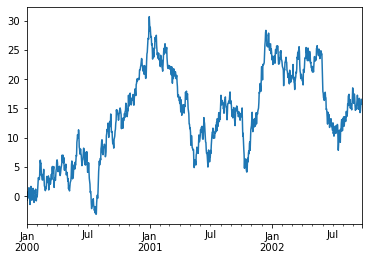

In [140]:
ts.plot()

In [144]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(1000,4), index = ts.index,columns = ['A','B','C','D'])
df

,A,B,C,D
2000-01-01,0.471435,-1.190976,1.432707,-0.312652
2000-01-02,-0.720589,0.887163,0.859588,-0.636524
2000-01-03,0.015696,-2.242685,1.150036,0.991946
2000-01-04,0.953324,-2.021255,-0.334077,0.002118
2000-01-05,0.405453,0.289092,1.321158,-1.546906
...,...,...,...,...
2002-09-22,0.606620,1.446567,-0.691402,0.955149
2002-09-23,0.672142,-0.355116,-0.240102,0.232473
2002-09-24,0.525020,-0.012250,-0.484403,0.761125
2002-09-25,-0.307001,-0.215848,-0.750894,0.283353


In [146]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.471435,-1.190976,1.432707,-0.312652
2000-01-02,0.222282,-1.494788,3.725002,-1.261827
2000-01-03,-0.011176,-4.041286,7.167333,-1.219057
2000-01-04,0.708691,-8.609039,10.275587,-1.174168
2000-01-05,1.834012,-12.887699,14.704999,-2.676184
...,...,...,...,...
2002-09-22,17559.120367,-11112.686158,8296.107755,39314.724559
2002-09-23,17572.484056,-11132.599416,8289.488557,39411.279788
2002-09-24,17586.372766,-11152.524924,8282.384956,39508.596142
2002-09-25,17599.954475,-11172.666280,8274.530461,39606.195849


<Figure size 432x288 with 0 Axes>

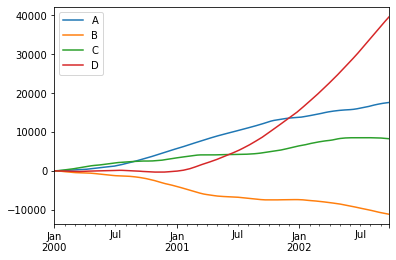

In [156]:
plt.figure()
df.plot()
plt.legend(loc = 'best')

## Getting Data in/out (데이터 입/출력)

In [157]:
%pwd

'C:\\Users\\ChangYong\\Documents\\GitHub\\TIL\\1. python'